<a href="https://colab.research.google.com/github/Thejasmayur31/TASK-5_ELEVATELAB_INTERN/blob/main/TASK_5_ELEVATELAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

import graphviz
from sklearn import tree

In [3]:
df=pd.read_csv('/content/heart.csv')

In [6]:
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [8]:
X = df.drop('target', axis=1)
y = df['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Accuracy: 0.9853658536585366


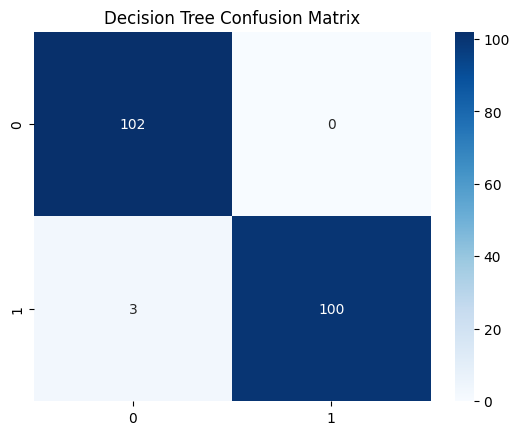

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

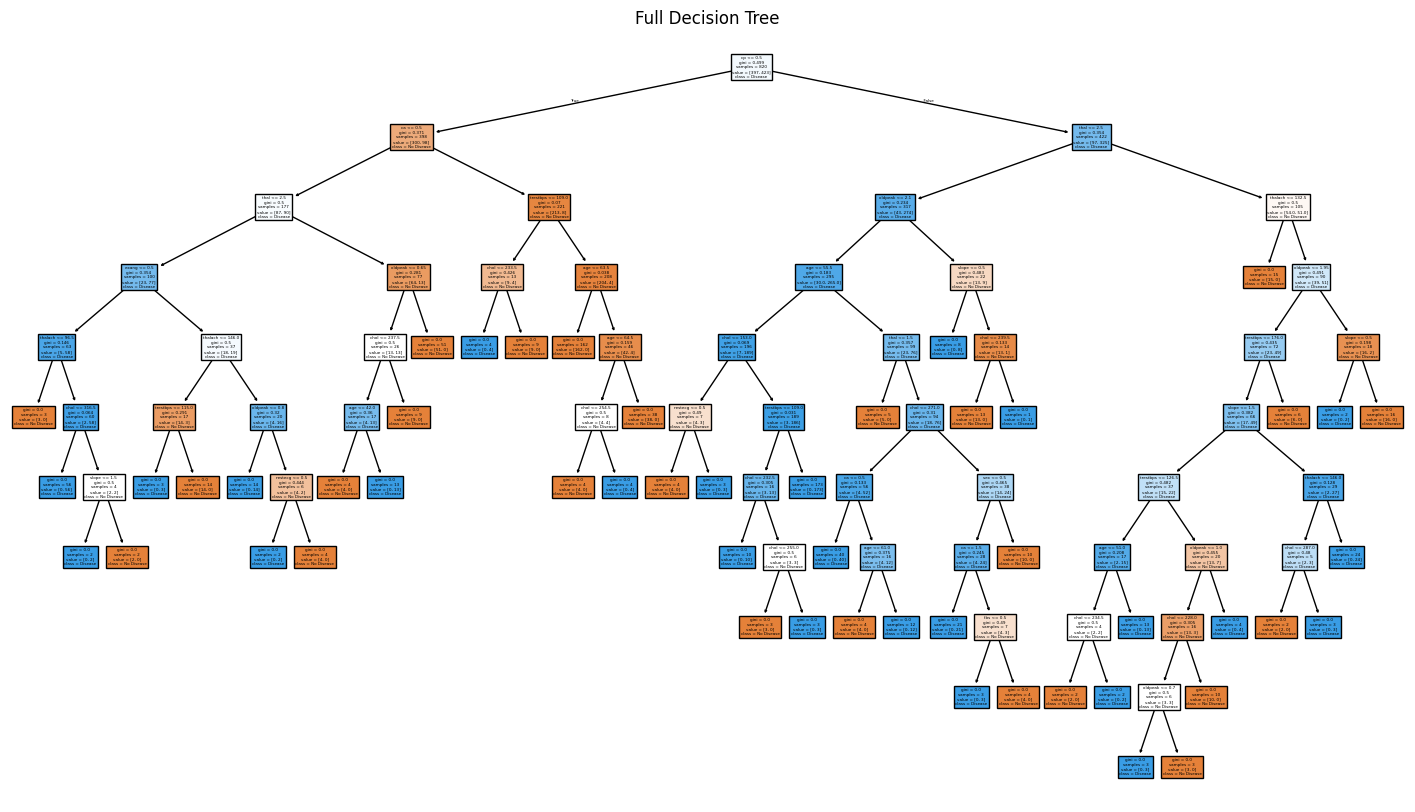

In [14]:
plt.figure(figsize=(18,10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Full Decision Tree")
plt.show()

In [15]:
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)


In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [17]:
print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Random Forest Accuracy: 0.9853658536585366


In [18]:
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)

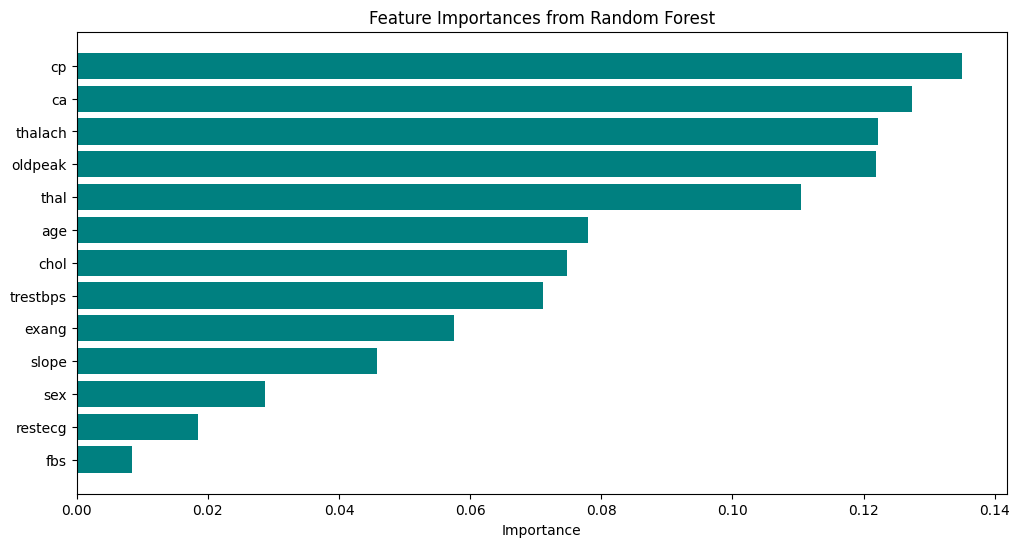

In [19]:
plt.figure(figsize=(12,6))
plt.barh(features[indices], importances[indices], color='teal')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.show()


In [20]:
dt_cv = cross_val_score(dt, X, y, cv=5)
rf_cv = cross_val_score(rf, X, y, cv=5)

print("\nCross-Val Accuracy (Decision Tree):", dt_cv.mean())
print("Cross-Val Accuracy (Random Forest):", rf_cv.mean())


Cross-Val Accuracy (Decision Tree): 1.0
Cross-Val Accuracy (Random Forest): 0.9970731707317073
